# Time Series Analysis
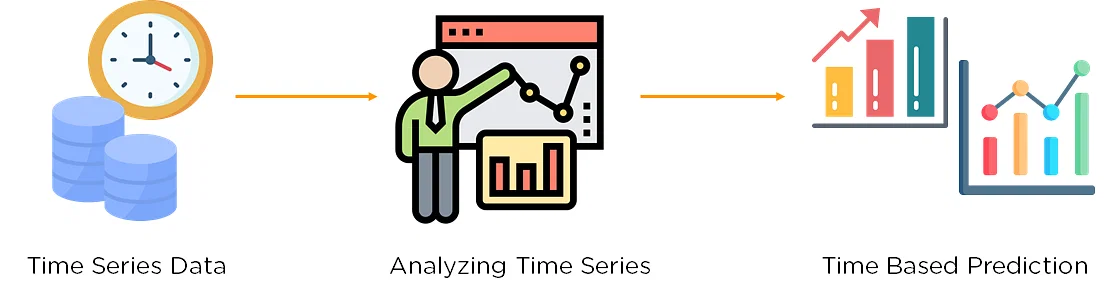
What is Time Series Analysis?
- Sometimes data changes over time. This data is called time-dependent data. Given time-dependent data, you can analyze the past to predict the future. The future prediction will also include time as a variable, and the output will vary with time. Using time-dependent data, you can! find patterns that repeat over time.
(ref SimpliLearn)

- A Time Series is a set of observations that are collected after regular intervals of time. If plotted, the Time series would always have one of its axes as time. 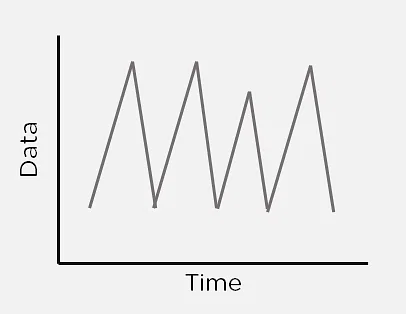
- Time Series Analysis in Python considers data collected over time might have some structure; hence it analyses Time Series data to extract its valuable characteristics.

## Components of TS
- Trend: The Trend shows the variation of data with time or the frequency of data. Using a Trend, you can see how your data increases or decreases over time. The data can increase, decrease, or remain stable. Over time, population, stock market fluctuations, and production in a company are all examples of trends.
- Seasonality: Seasonality is used to find the variations which occur at regular intervals of time. Examples are festivals, conventions, seasons, etc. These variations usually happen around the same time period and affect the data in specific ways which you can predict. 
- Irregularity: Fluctuations in the time series data do not correspond to the trend or seasonality. These variations in your time series are purely random and usually caused by unforeseeable circumstances, such as a sudden decrease in population because of a natural calamity.
- Cyclic: Oscillations in time series which last for more than a year are called cyclic. They may or may not be periodic. 
- Stationary: A time series that has the same statistical properties over time is stationary. The properties remain the same anywhere in the series. Your data needs to be stationary to perform time-series analysis on it. A stationary series has a constant mean, variance, and covariance.
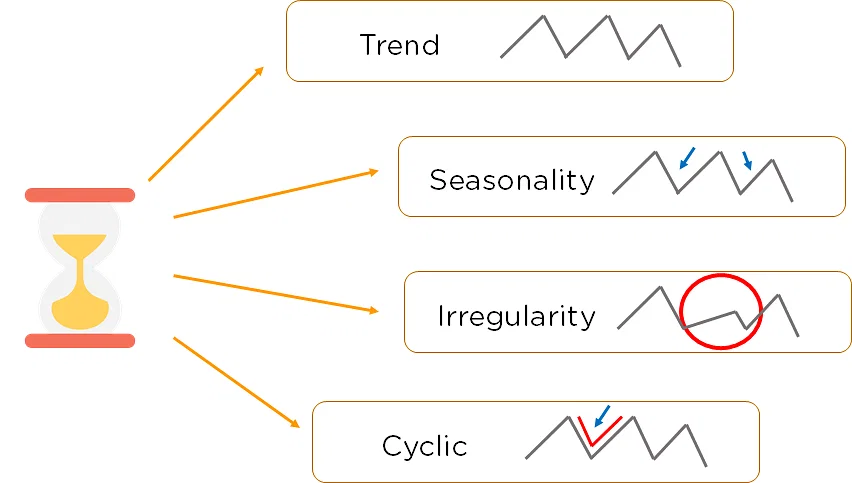

## ARIMA
Auto Regressive(AR) Integration(I) Moving Average (MA)
ARIMA Model stands for Auto-Regressive Integrated Moving Average. It is used to predict the future values of a time series using its past values and forecast errors. The below diagram shows the components of an ARIMA model: 
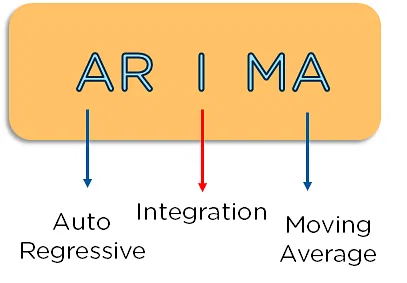

### Auto Regressive (AR) - p
Auto-Regressive models predict future behavior using past behavior where there is some correlation between past and future data. The formula below represents the autoregressive model. It is a modified version of the slope formula with the target value being expressed as the sum of the intercept, the product of a coefficient and the previous output, and an error correction term
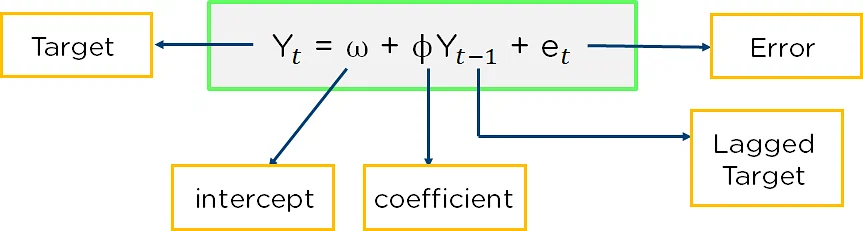

### Integration (I) - d
- Integration is the difference between present and previous observations. It is used to make the time series stationary. 


### Moving Average (MA) - q
- Moving Average is a statistical method that takes the updated average of values to help cut down on noise. It takes the average over a specific interval of time. You can get it by taking different subsets of your data and finding their respective averages.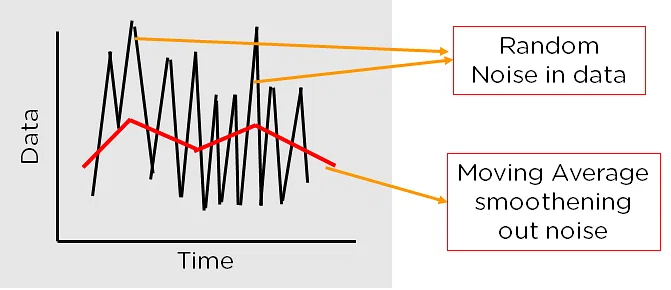
- You first consider a bunch of data points and take their average. You then find the next average by removing the first value of the data and including the next value of the series.

### Parameters p, d, q
- Each of these values acts as a parameter for our ARIMA model. Instead of representing the ARIMA model by these various operators and models, you use parameters to represent them. These parameters are: 
- p: Previous lagged values for each time point. Derived from the Auto-Regressive Model.
- q: Previous lagged values for the error term. Derived from the Moving Average.
- d: Number of times data is differenced to make it stationary. It is the number of times it performs integration.

In [53]:
## Libraries
import pandas as pd  # read_csv, datetime, plotting.autocorrelation_plot, DataFrame
import matplotlib.pyplot as plt # graphs
#import statsmodels as sm # tsa.arima_model.ARIMA
import datetime as dt
from statsmodels.tsa.arima.model import ARIMA

#### Data
- This dataset describes the monthly number of sales of shampoo over a 3 year period. The units are a sales count and there are 36 observations.
https://raw.githubusercontent.com/DUanalytics/datasets/master/csv/ts_shampooSales.csv
"Month","Sales"
"1-01",266.0
"1-02",145.9
"1-03",183.1

In [13]:
DL ='https://raw.githubusercontent.com/DUanalytics/datasets/master/csv/ts_shampooSales.csv'
DL ='D:/HHE/data/ts_shampooSales.csv'
df = pd.read_csv(DL) #, header=0) #, parse_dates[0], squeeze=True) #
print(df.shape, '\n', df.dtypes)

(36, 2) 
 Month     object
Sales    float64
dtype: object


In [14]:
df.head(2)

,Month,Sales
0,1-01,266.0
1,1-02,145.9


In [26]:
ts1 = pd.read_csv(DL, header=0, parse_dates=[0], index_col=0).squeeze(0) #
print(ts1.shape, '\n', ts1.dtypes)
# squeeze - Squeeze 1 dimensional axis objects into scalars.
#DataFrames with a single column or a single row are squeezed to a Series. Otherwise the object is unchanged.

(36, 1) 
 Sales    float64
dtype: object


In [28]:
ts1.head(2)

,Sales
Month,
1-01,266.0
1-02,145.9


In [35]:
dateParser1 = lambda x : dt.datetime.strptime('200'+ x, '%Y-%m')
ts2 = pd.read_csv(DL, header=0, parse_dates=[0], index_col=0, date_parser =  dateParser1).squeeze(0) #
print(ts1.shape, '\n', ts1.dtypes)
# squeeze - Squeeze 1 dimensional axis objects into scalars.
#DataFrames with a single column or a single row are squeezed to a Series. Otherwise the object is unchanged.

(36, 1) 
 Sales    float64
dtype: object


In [37]:
ts2.head(3)

,Sales
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1


In [39]:
ts2.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,36.0,312.6,148.937164,119.3,192.45,280.15,411.1,682.0


In [41]:
ts2.index

DatetimeIndex(['2001-01-01', '2001-02-01', '2001-03-01', '2001-04-01',
               '2001-05-01', '2001-06-01', '2001-07-01', '2001-08-01',
               '2001-09-01', '2001-10-01', '2001-11-01', '2001-12-01',
               '2002-01-01', '2002-02-01', '2002-03-01', '2002-04-01',
               '2002-05-01', '2002-06-01', '2002-07-01', '2002-08-01',
               '2002-09-01', '2002-10-01', '2002-11-01', '2002-12-01',
               '2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01', '2003-11-01', '2003-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

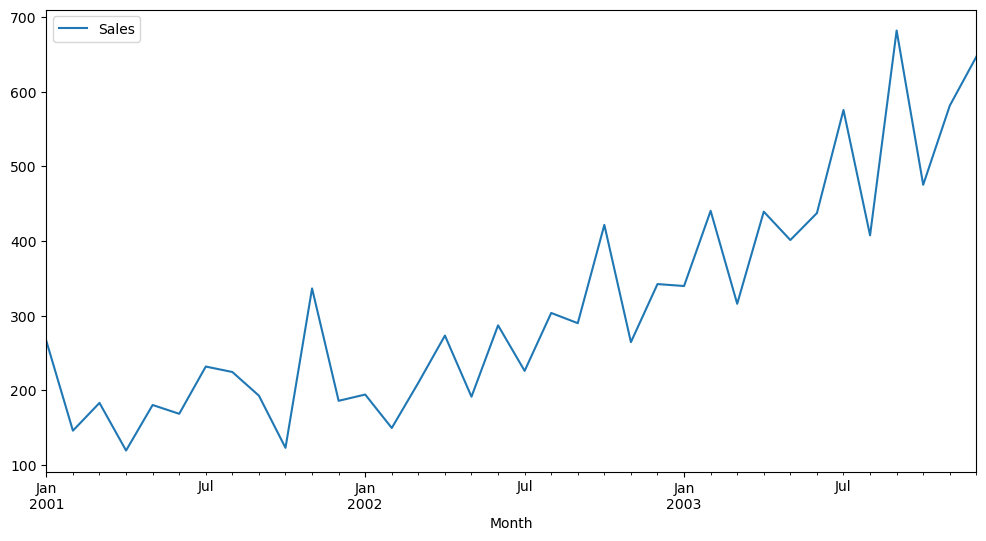

In [45]:
# plot
ts2.plot(figsize=(12,6))
plt.show();

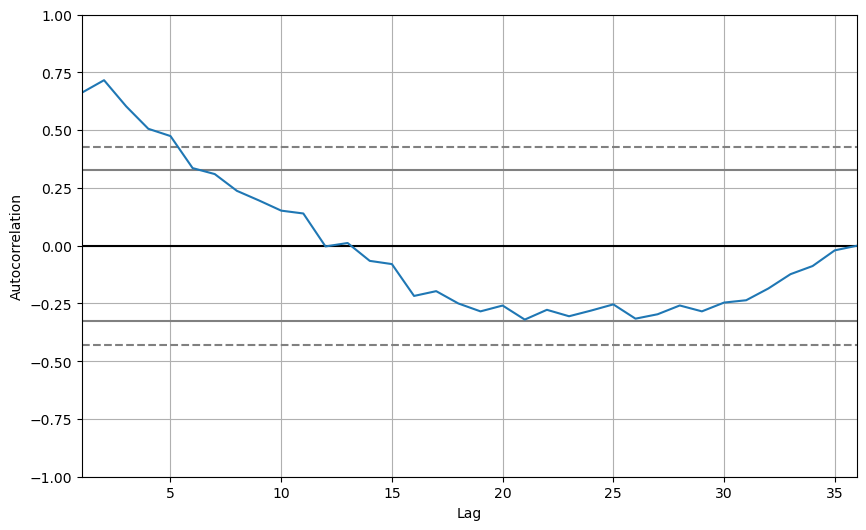

In [48]:
# Autocorrelation
plt.figure(figsize=(10,6))
pd.plotting.autocorrelation_plot(ts2)
plt.show();
# positive cor with 1st 1-5 and upto 12 lags

### Model
fit your data to your model and find the residual error. It is obtained by separating data values from the mean of the data. This helps you find out if variations in your data are huge.

In [57]:
tsModel = ARIMA(ts2, order = (5,1,0))
#some months are missing in DF

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [59]:
tsModel_fit = tsModel.fit()
print(tsModel_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Tue, 14 Mar 2023   AIC                            408.969
Time:                        12:21:43   BIC                            418.301
Sample:                    01-01-2001   HQIC                           412.191
                         - 12-01-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

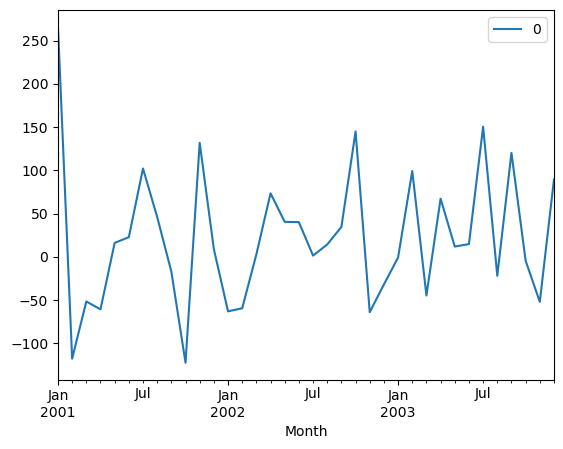

In [61]:
residuals = pd.DataFrame(tsModel_fit.resid)
residuals.plot()
plt.show();

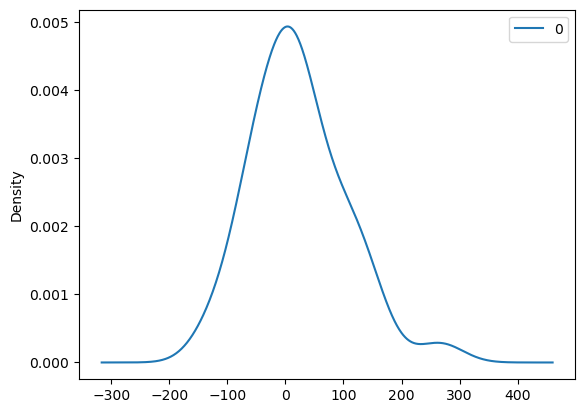

In [62]:
residuals.plot(kind='kde')
plt.show();

In [63]:
print(residuals.describe())
# errors are Gaussian/ Normal and are not centered around 0.

                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


first we looked at the time series and time series analysis. Then you looked at the different components of time series analysis and at the ARIMA model, a time series analysis model. Finally, you saw how to implement time series analysis in python.  
Next is to predict for certain future and also create auto arima.
Also we should be able to find if the TS is stationary, with components
auto_arima is an automated arima function of this library, which is created to find the optimal order and the optimal seasonal order, based on determined criterion such as AIC, BIC, etc., and within the designated parameter restrictions, that fits the best model to a single variable (univariable) time series.

In [66]:
#!pip install pmdarima
from pmdarima.arima import auto_arima

In [67]:
tsModel_AR = auto_arima(ts2, start_p=0, start_q=0)
tsModel_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -195.731
Date:                Tue, 14 Mar 2023   AIC                            401.463
Time:                        12:29:03   BIC                            409.240
Sample:                    01-01-2001   HQIC                           404.147
                         - 12-01-2003                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.3015      6.173      1.507      0.132      -2.798      21.401
ar.L1          0.0891      0.314      0.284      0.776      -0.525       0.704
ma.L1         -1.3869      0.315     -4.403      0.000      -2.004      -0.769
ma.L2          0.9423      0.449      2.098      0.036       0.062       1.823
sigma2      3695.8964   1457.495      2.536      0.011     839.258    6552.534
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 0.81
Prob(Q):                              0.64   Prob(JB):                         0.67
Heteroskedasticity (H):               0.95   Skew:                             0.30
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

summary property provides all the information regarding our model. We see that our model used (1, 1, 2) for (p, d, q) order. We see the coefficients, p-value, AIC, and BIC, which provide information on whether the model is good or not
Plot diagnostics for standardized residuals using plot_diagnostics(). This will provide information on:

Standardized residuals over time
Histogram plus estimated density of standardized residuals, along with a Normal (0,1) density plotted for reference
Normal Q-Q plot, with Normal reference line
Correlogram

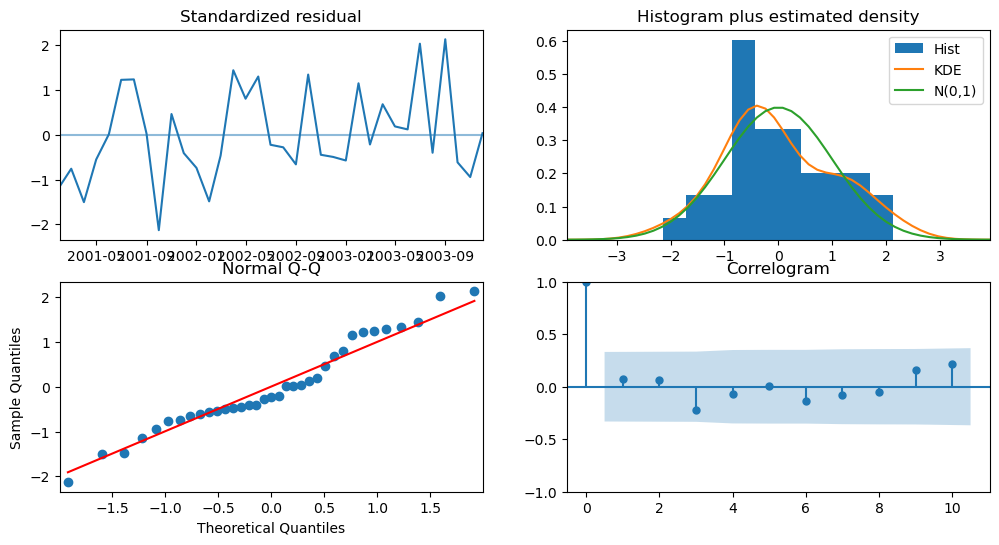

In [71]:
tsModel_AR.plot_diagnostics(figsize=(12,6))
plt.show();

# Model forecast
get_forecast() and conf_int() built-in methods to forecast our model. The forecast_to_df function will take model and steps as input and return a data frame with predictions, showing the lower confidence interval and upper confidence interval as columns.

In [77]:
forecast = tsModel_AR.fit_predict(ts2, n_periods=5)

In [80]:
pred_df = tsModel_AR.conf_int()
pred_df

,0,1
intercept,-2.798023,21.400969
ar.L1,-0.525340,0.703606
ma.L1,-2.004344,-0.769474
ma.L2,0.061872,1.822745
sigma2,839.258334,6552.534489


In [74]:
def forecast_to_df(model, steps=12):
    forecast = model.fit_predict(steps=steps)
    pred_df = forecast.conf_int()
    pred_df['pred'] = forecast.predicted_mean
    pred_df.columns = ['lower', 'upper', 'pred']
    return pred_df

In [75]:
pred_df = forecast_to_df(tsModel_AR, steps = 5)

TypeError: fit_predict() missing 1 required positional argument: 'y'

In [ ]:
tsModel_AR.fit_predict

## Link
https://www.simplilearn.com/tutorials/python-tutorial/time-series-analysis-in-python
https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
https://betterprogramming.pub/using-auto-arima-with-python-e482e322f430